In [3]:

import pandas as pd
import plotnine as p9
from palmerpenguins import load_penguins
from plotnine import *
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
df = pd.read_csv(url)

scattered_df=df[["appeared","is_open_source"]]


scattered_df=scattered_df.dropna()
scattered_df=scattered_df[scattered_df['appeared']>1950]
scattered_df


,appeared,is_open_source
13,1995,True
16,1993,True
18,2009,True
19,2004,True
20,2014,True
...,...,...
2498,1980,True
2500,2008,True
2658,2017,False
2749,2015,True


In [2]:
scattered_df

,appeared,is_open_source
0,1995,NaN
1,1995,NaN
2,1972,NaN
3,1991,NaN
4,1974,NaN
...,...,...
4298,1976,NaN
4299,1997,NaN
4300,1955,NaN
4301,1977,NaN


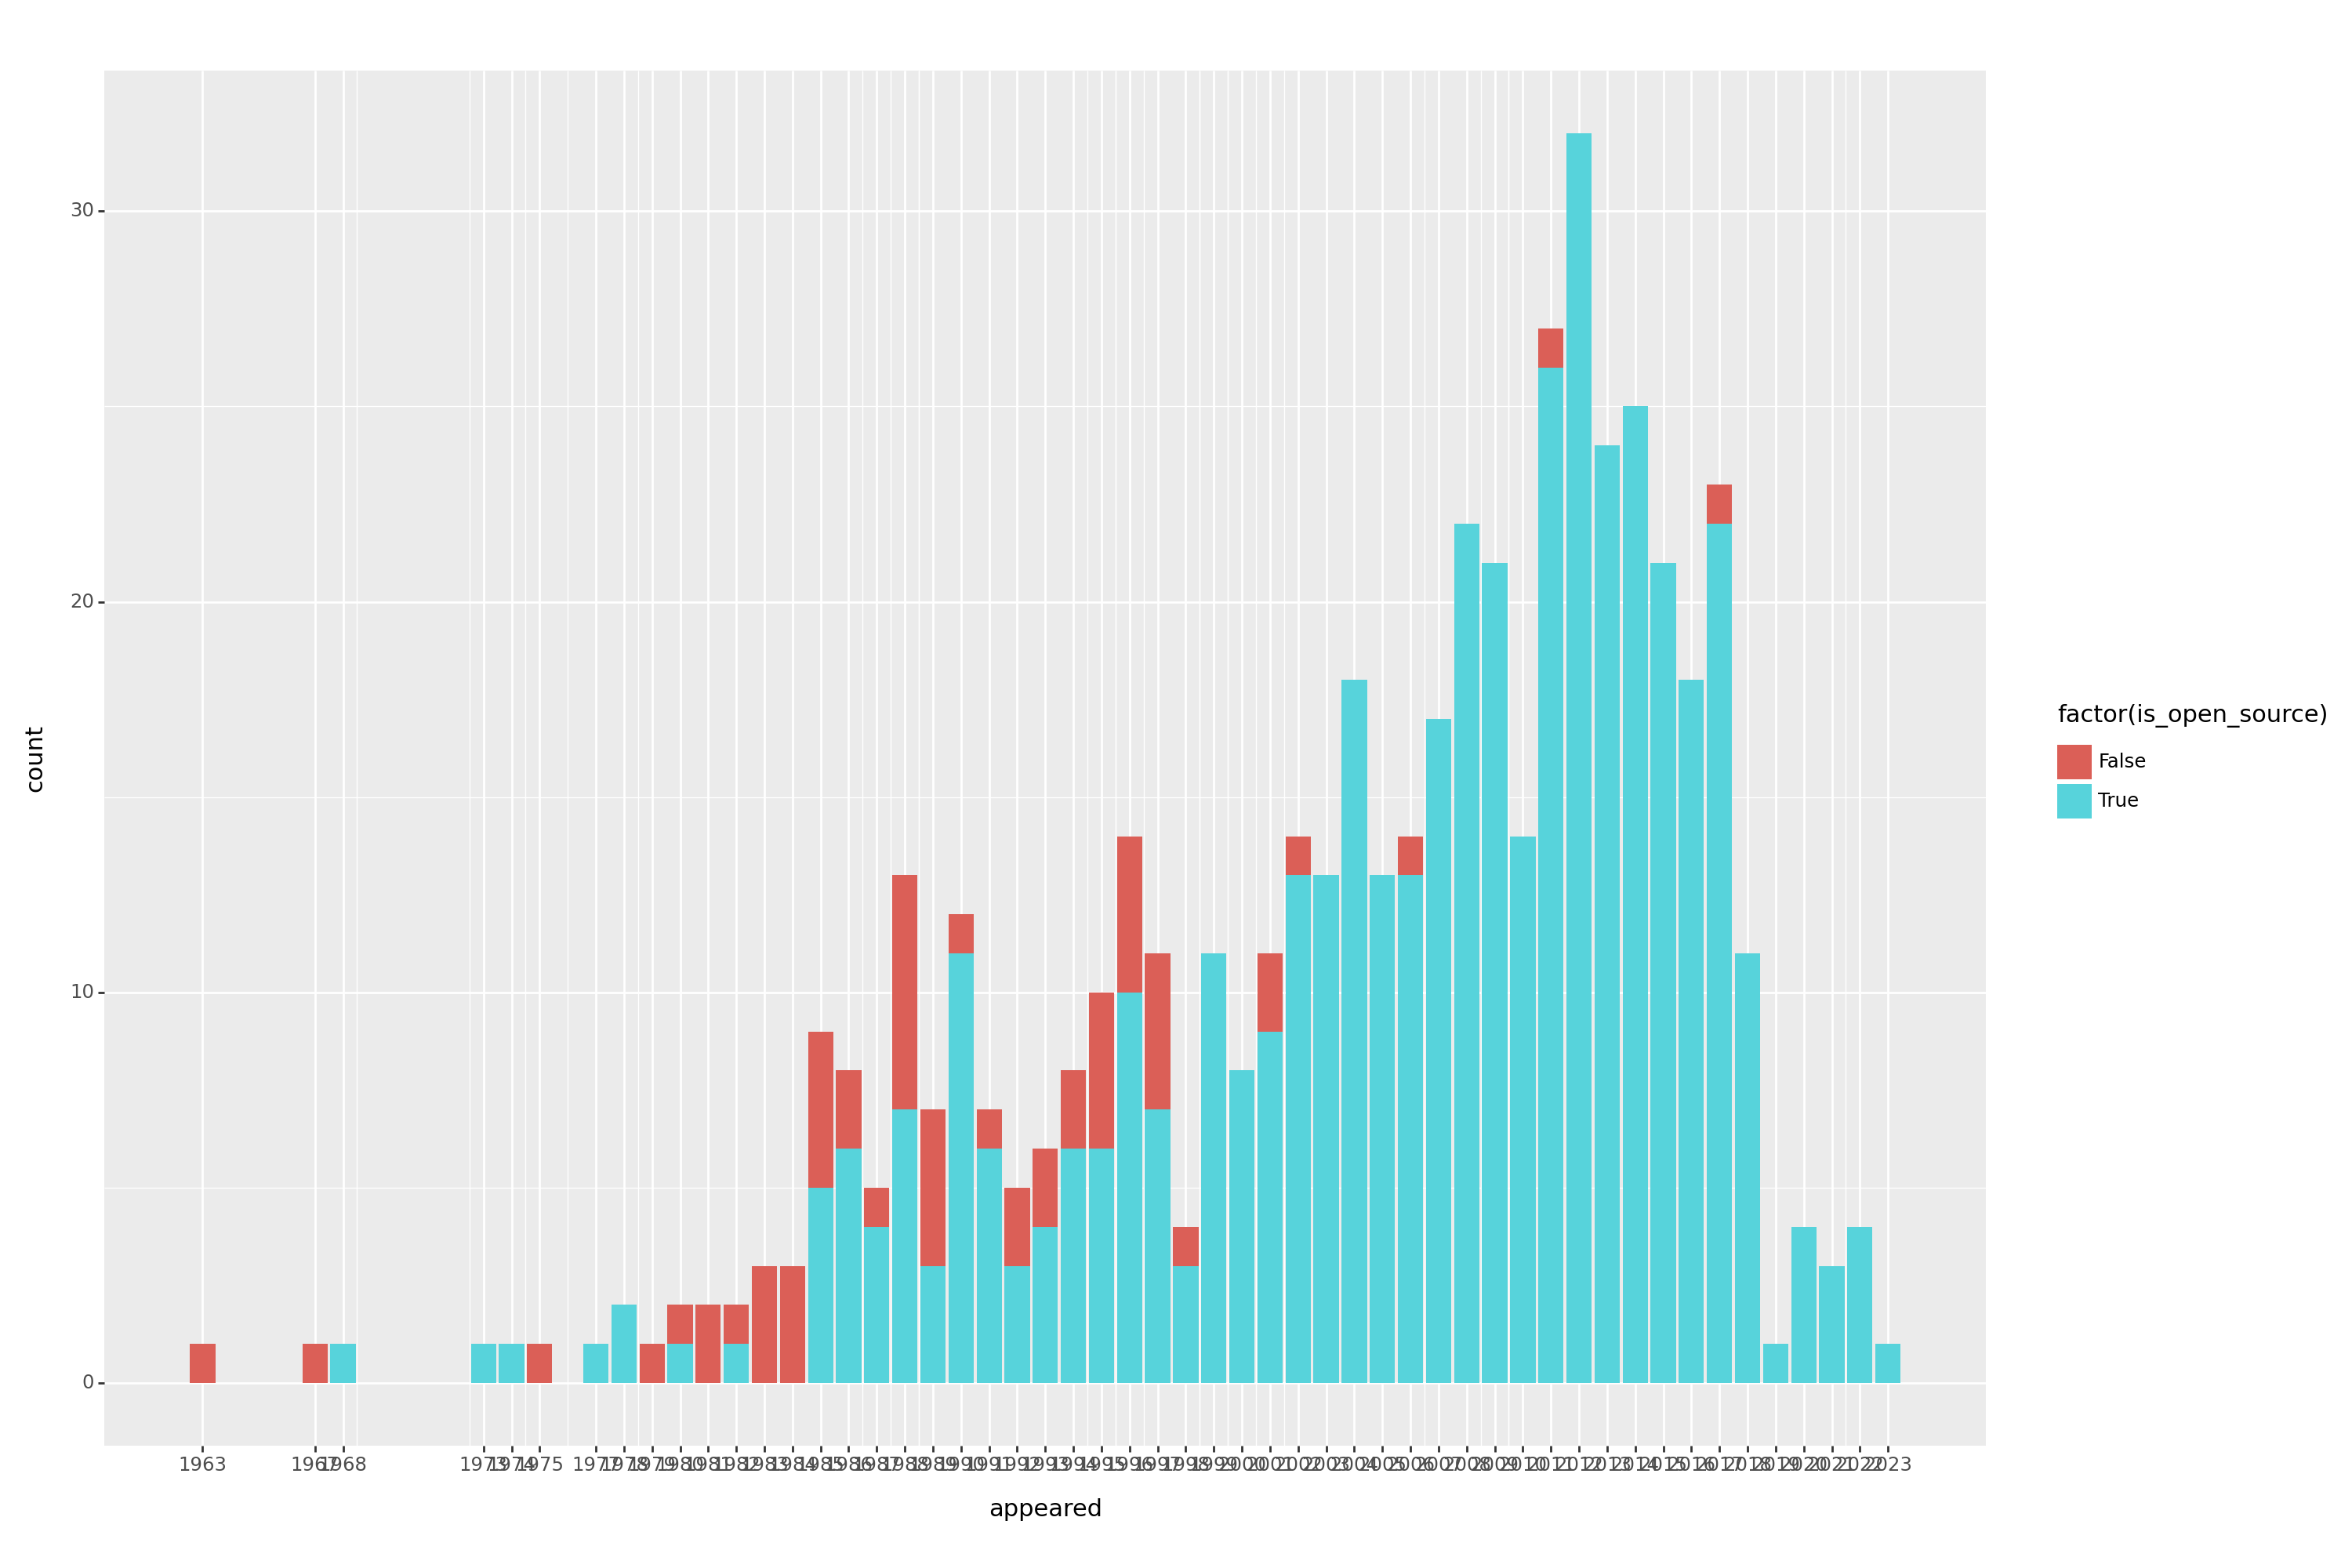

In [8]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_bar, scale_x_continuous, theme_minimal

# Create a ggplot object
plot = (
    ggplot(scattered_df, aes(x='appeared', fill='factor(is_open_source)')) +
    geom_bar() +
    scale_x_continuous(breaks=list(scattered_df['appeared'].unique()), labels=list(scattered_df['appeared'].unique())) +
    theme(figure_size=(15, 10))
)

# Show the plot
print(plot)


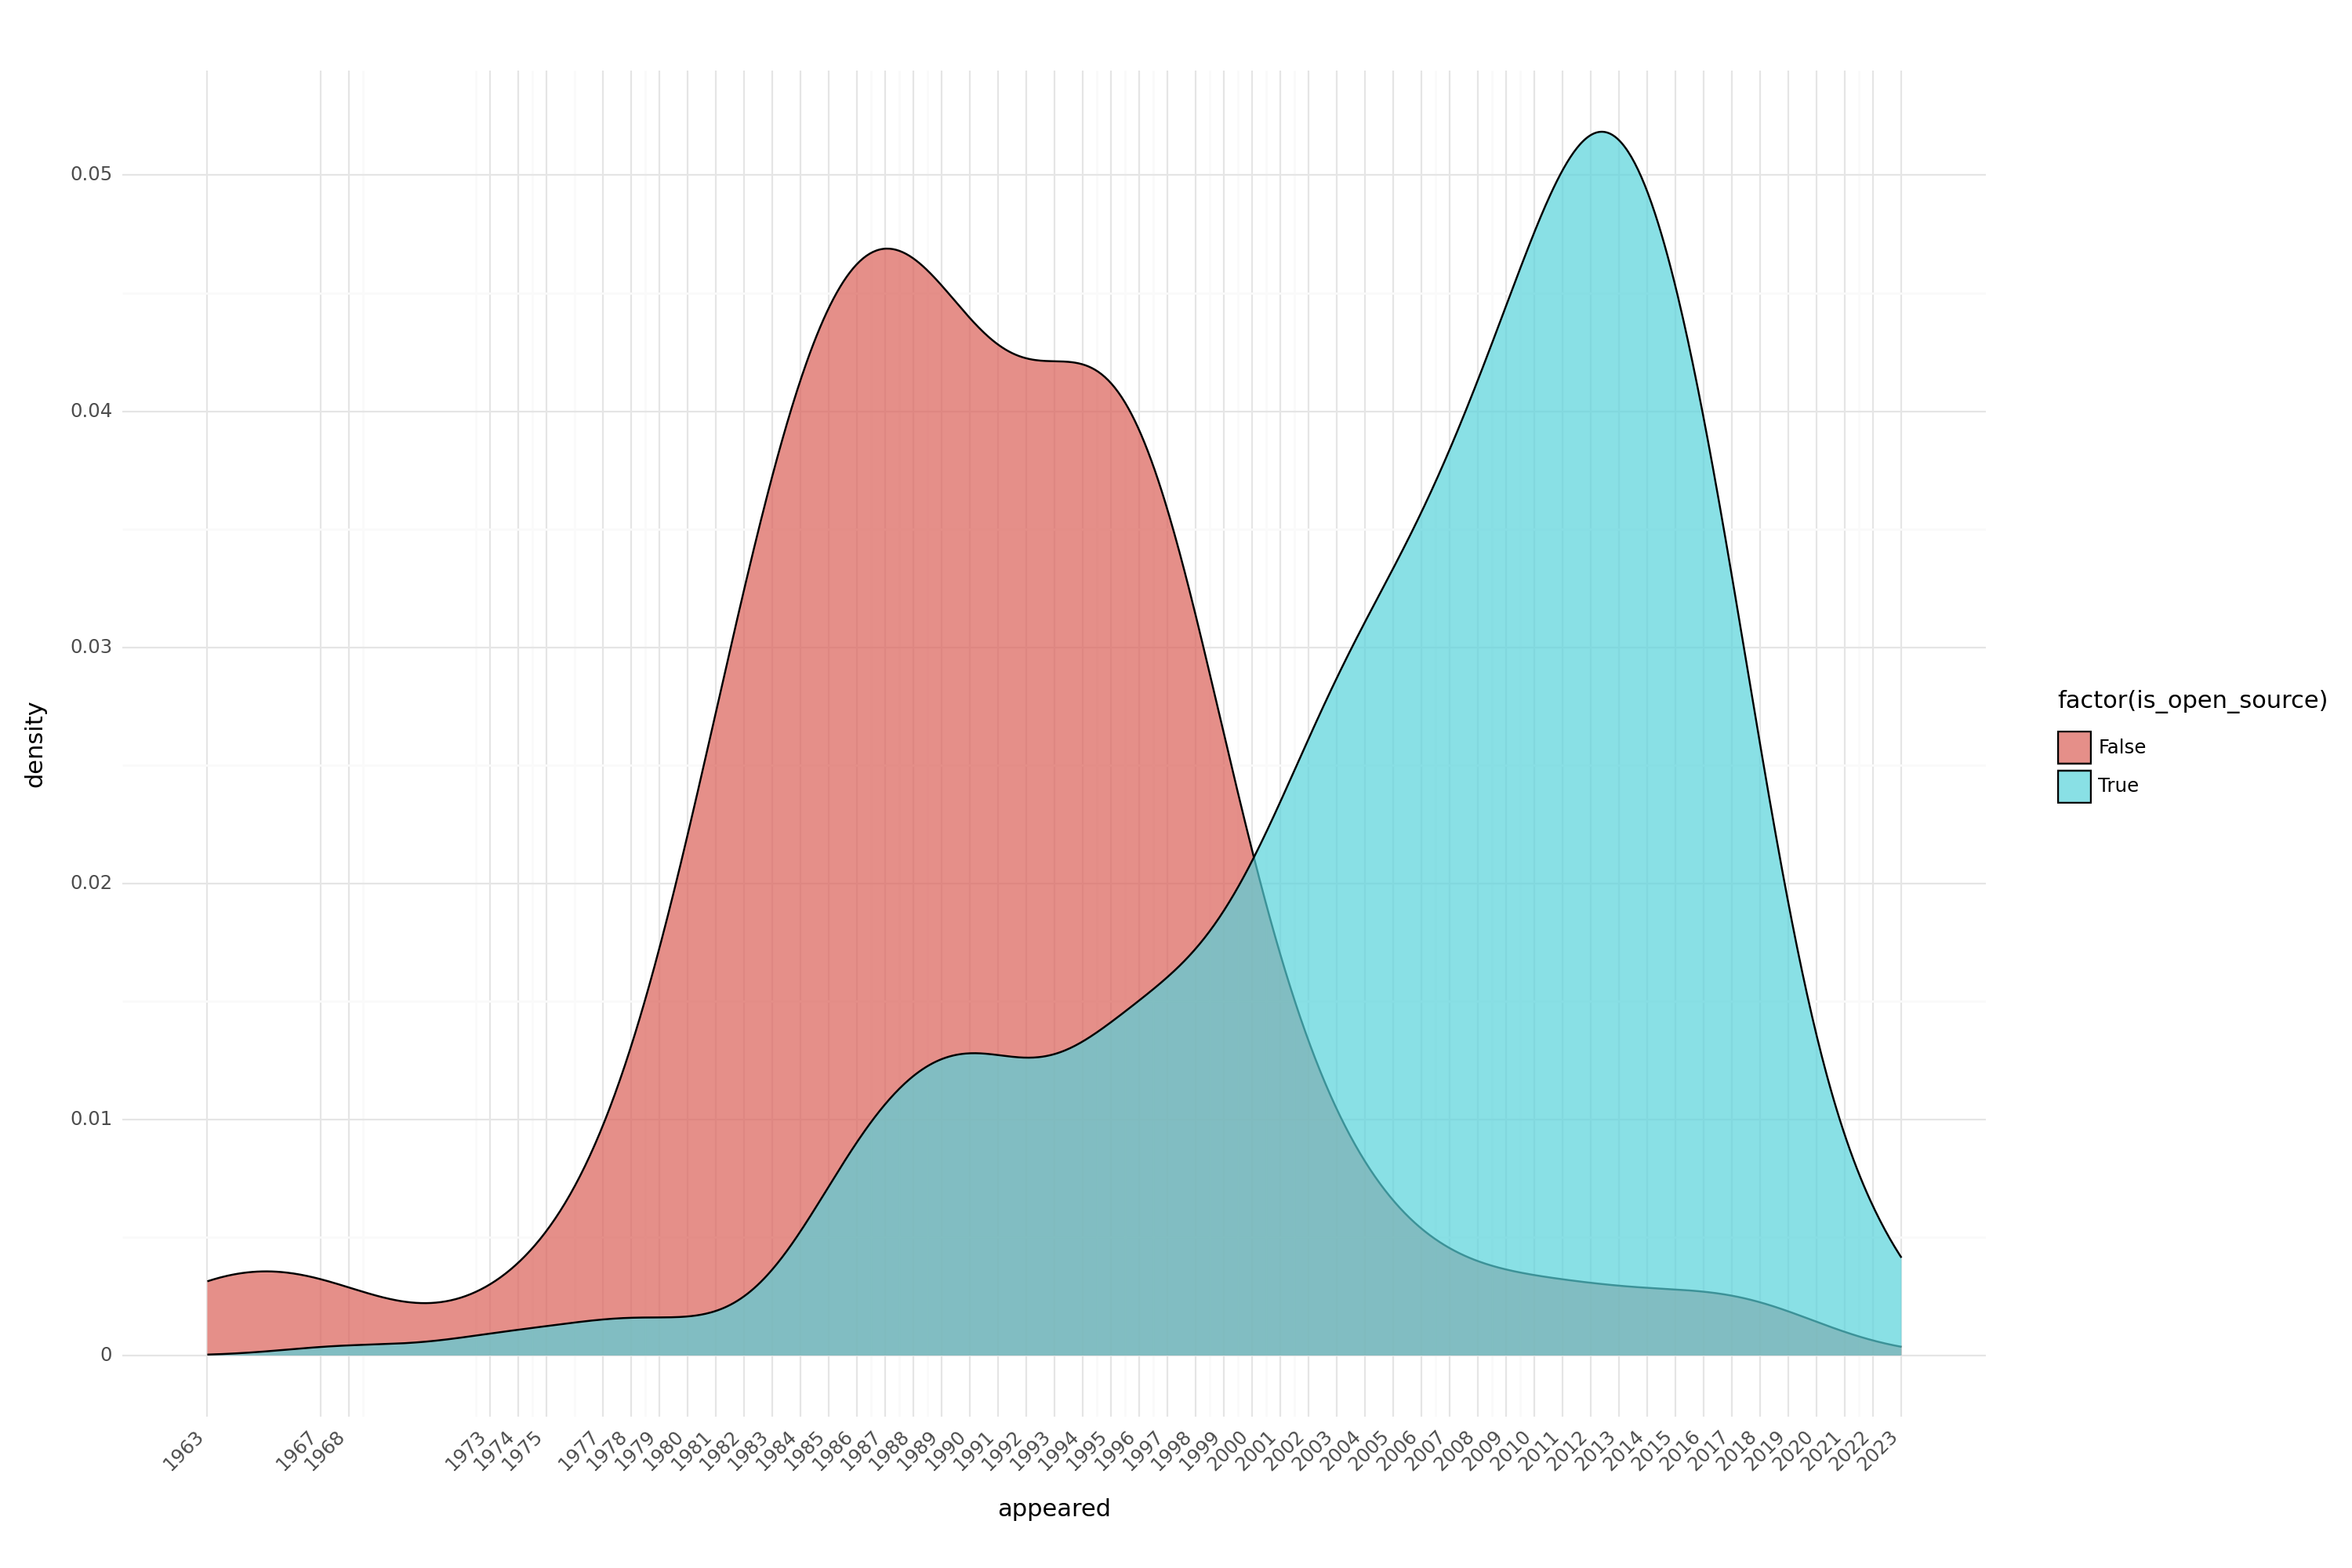

In [12]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_density, scale_x_continuous, theme_minimal, theme

# Create a ggplot object
plot = (
    ggplot(scattered_df, aes(x='appeared', fill='factor(is_open_source)')) +
    geom_density(alpha=0.7) +  # Use alpha to control transparency
    scale_x_continuous(breaks=list(scattered_df['appeared'].unique()), labels=list(scattered_df['appeared'].unique())) +
    theme_minimal() +
    theme(figure_size=(15, 10), axis_text_x=element_text(angle=45, hjust=1))
)

# Show the plot
print(plot)


In [2]:
main_10_types_df=scattered_df.groupby(["type"]).agg({"number_of_jobs":"sum"}).reset_index()
main_10_types_df = main_10_types_df.sort_values(by="number_of_jobs",ascending=False).head(5)["type"]
main_10_types_df

26         protocol
24               pl
27    queryLanguage
33       textMarkup
5      dataNotation
Name: type, dtype: object

In [3]:
import numpy as np

scattered_df['type'] = np.where(~scattered_df['type'].isin(main_10_types_df), 'other', scattered_df['type'])
scattered_df['type'].unique()
scattered_df


,appeared,number_of_jobs,type
0,1995,85206,pl
1,1995,63993,pl
2,1972,59919,pl
3,1991,46976,pl
4,1974,219617,queryLanguage
...,...,...,...
4298,1976,0,pl
4299,1997,0,pl
4300,1955,0,pl
4301,1977,0,pl


In [4]:
scattered_df_gp = scattered_df.groupby(["appeared","type"]).agg({"number_of_jobs":"sum"}).reset_index()
scattered_df_gp

,appeared,type,number_of_jobs
0,1951,pl,0
1,1951,queryLanguage,0
2,1952,other,0
3,1952,pl,0
4,1953,other,0
...,...,...,...
276,2022,pl,0
277,2022,protocol,0
278,2022,queryLanguage,0
279,2022,textMarkup,0


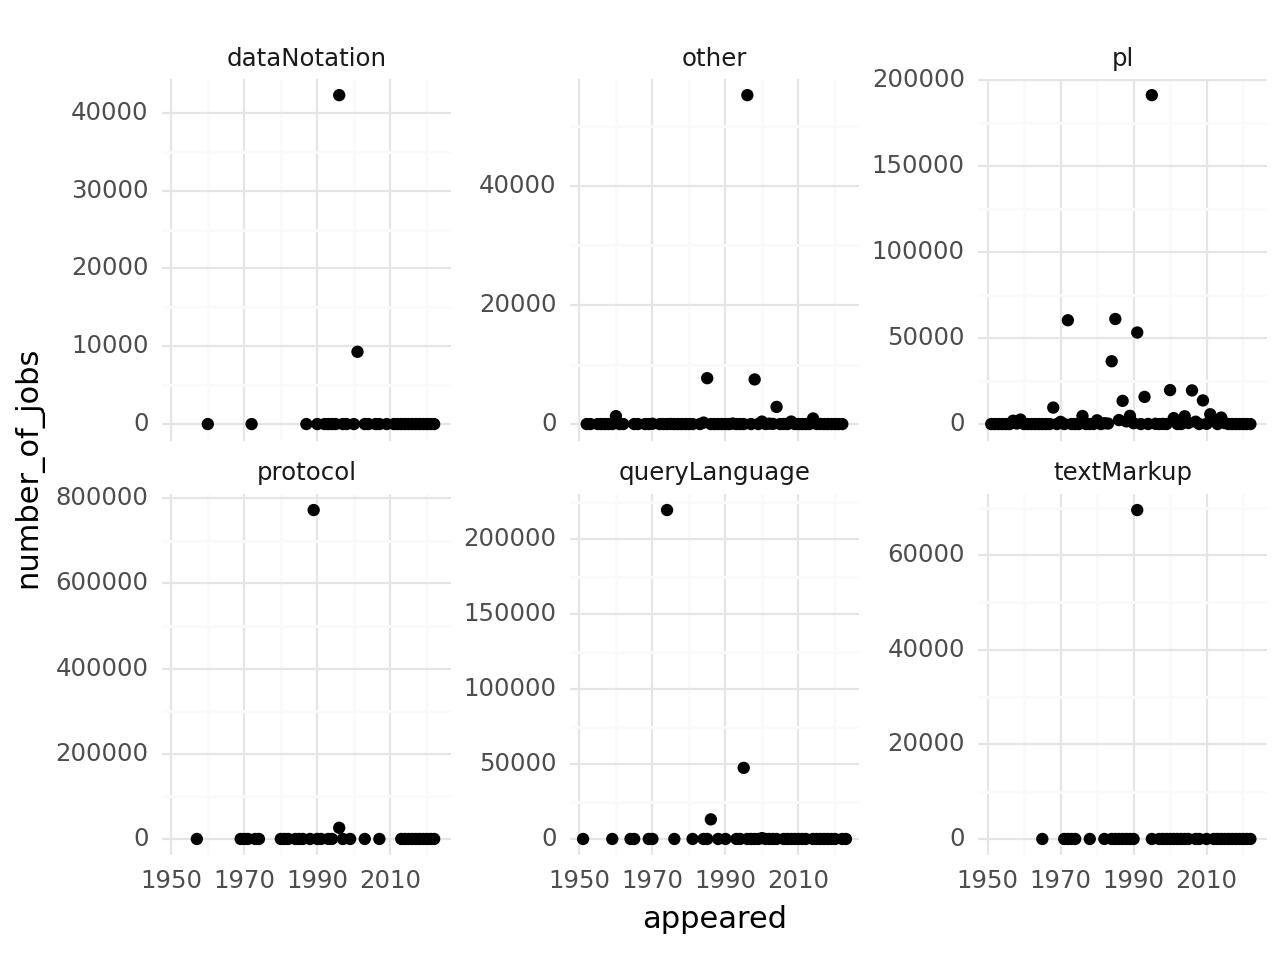

In [5]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, theme_minimal

# Create scatter plots with facets
scatter_plots = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_jobs')) +
    geom_point() +
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  # Optional: Customize the theme
)

# Show the plot
print(scatter_plots)


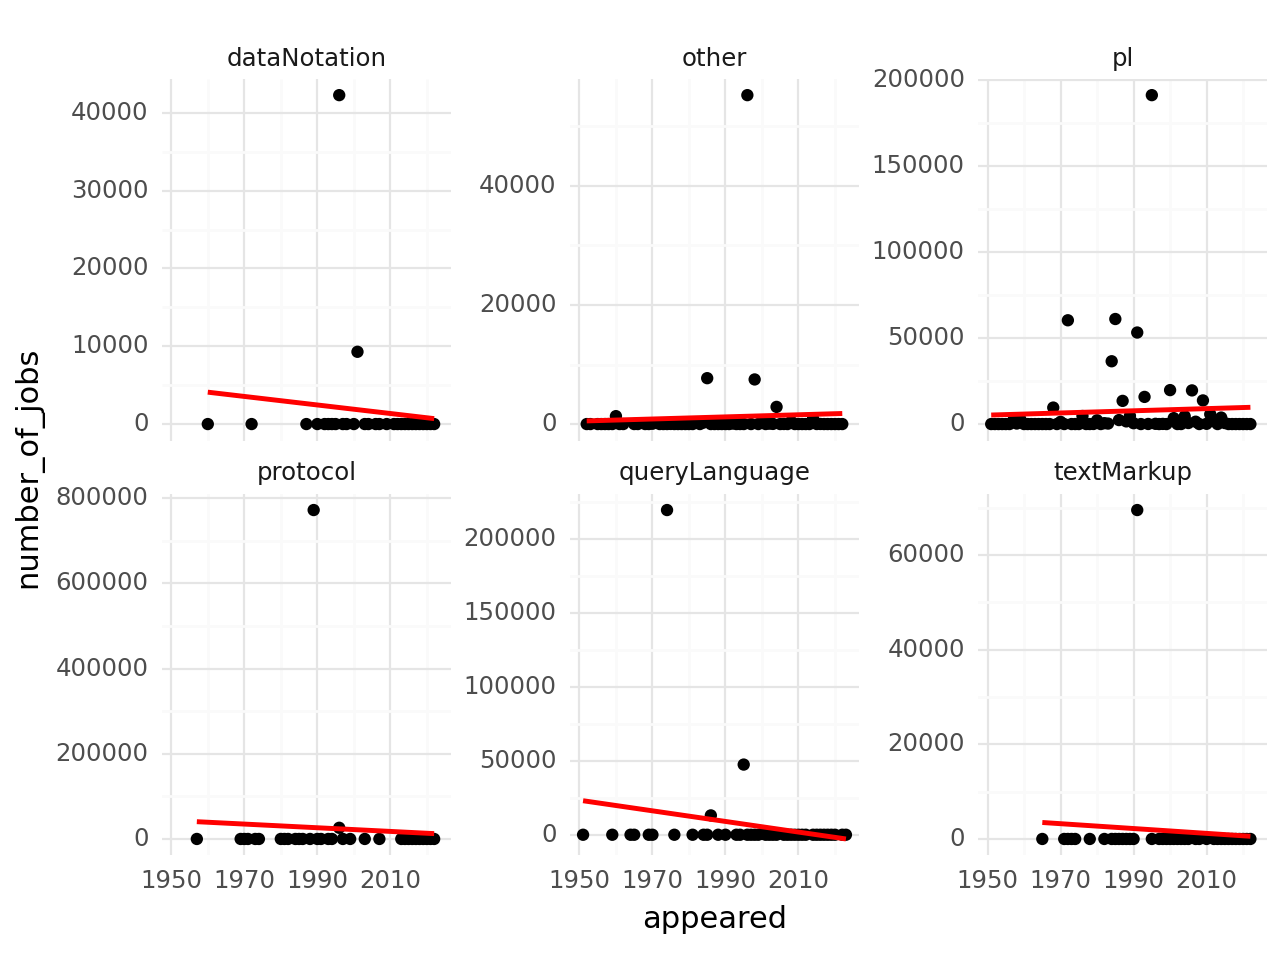

In [6]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, stat_smooth, theme_minimal

# Create scatter plots with facets and fitted lines
scatter_plots_with_fitted_lines = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_jobs')) +
    geom_point() +
    stat_smooth(method='lm', se=False, color='red') +  # Add a fitted line (linear regression)
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  # Optional: Customize the theme
)

# Show the plot
print(scatter_plots_with_fitted_lines)


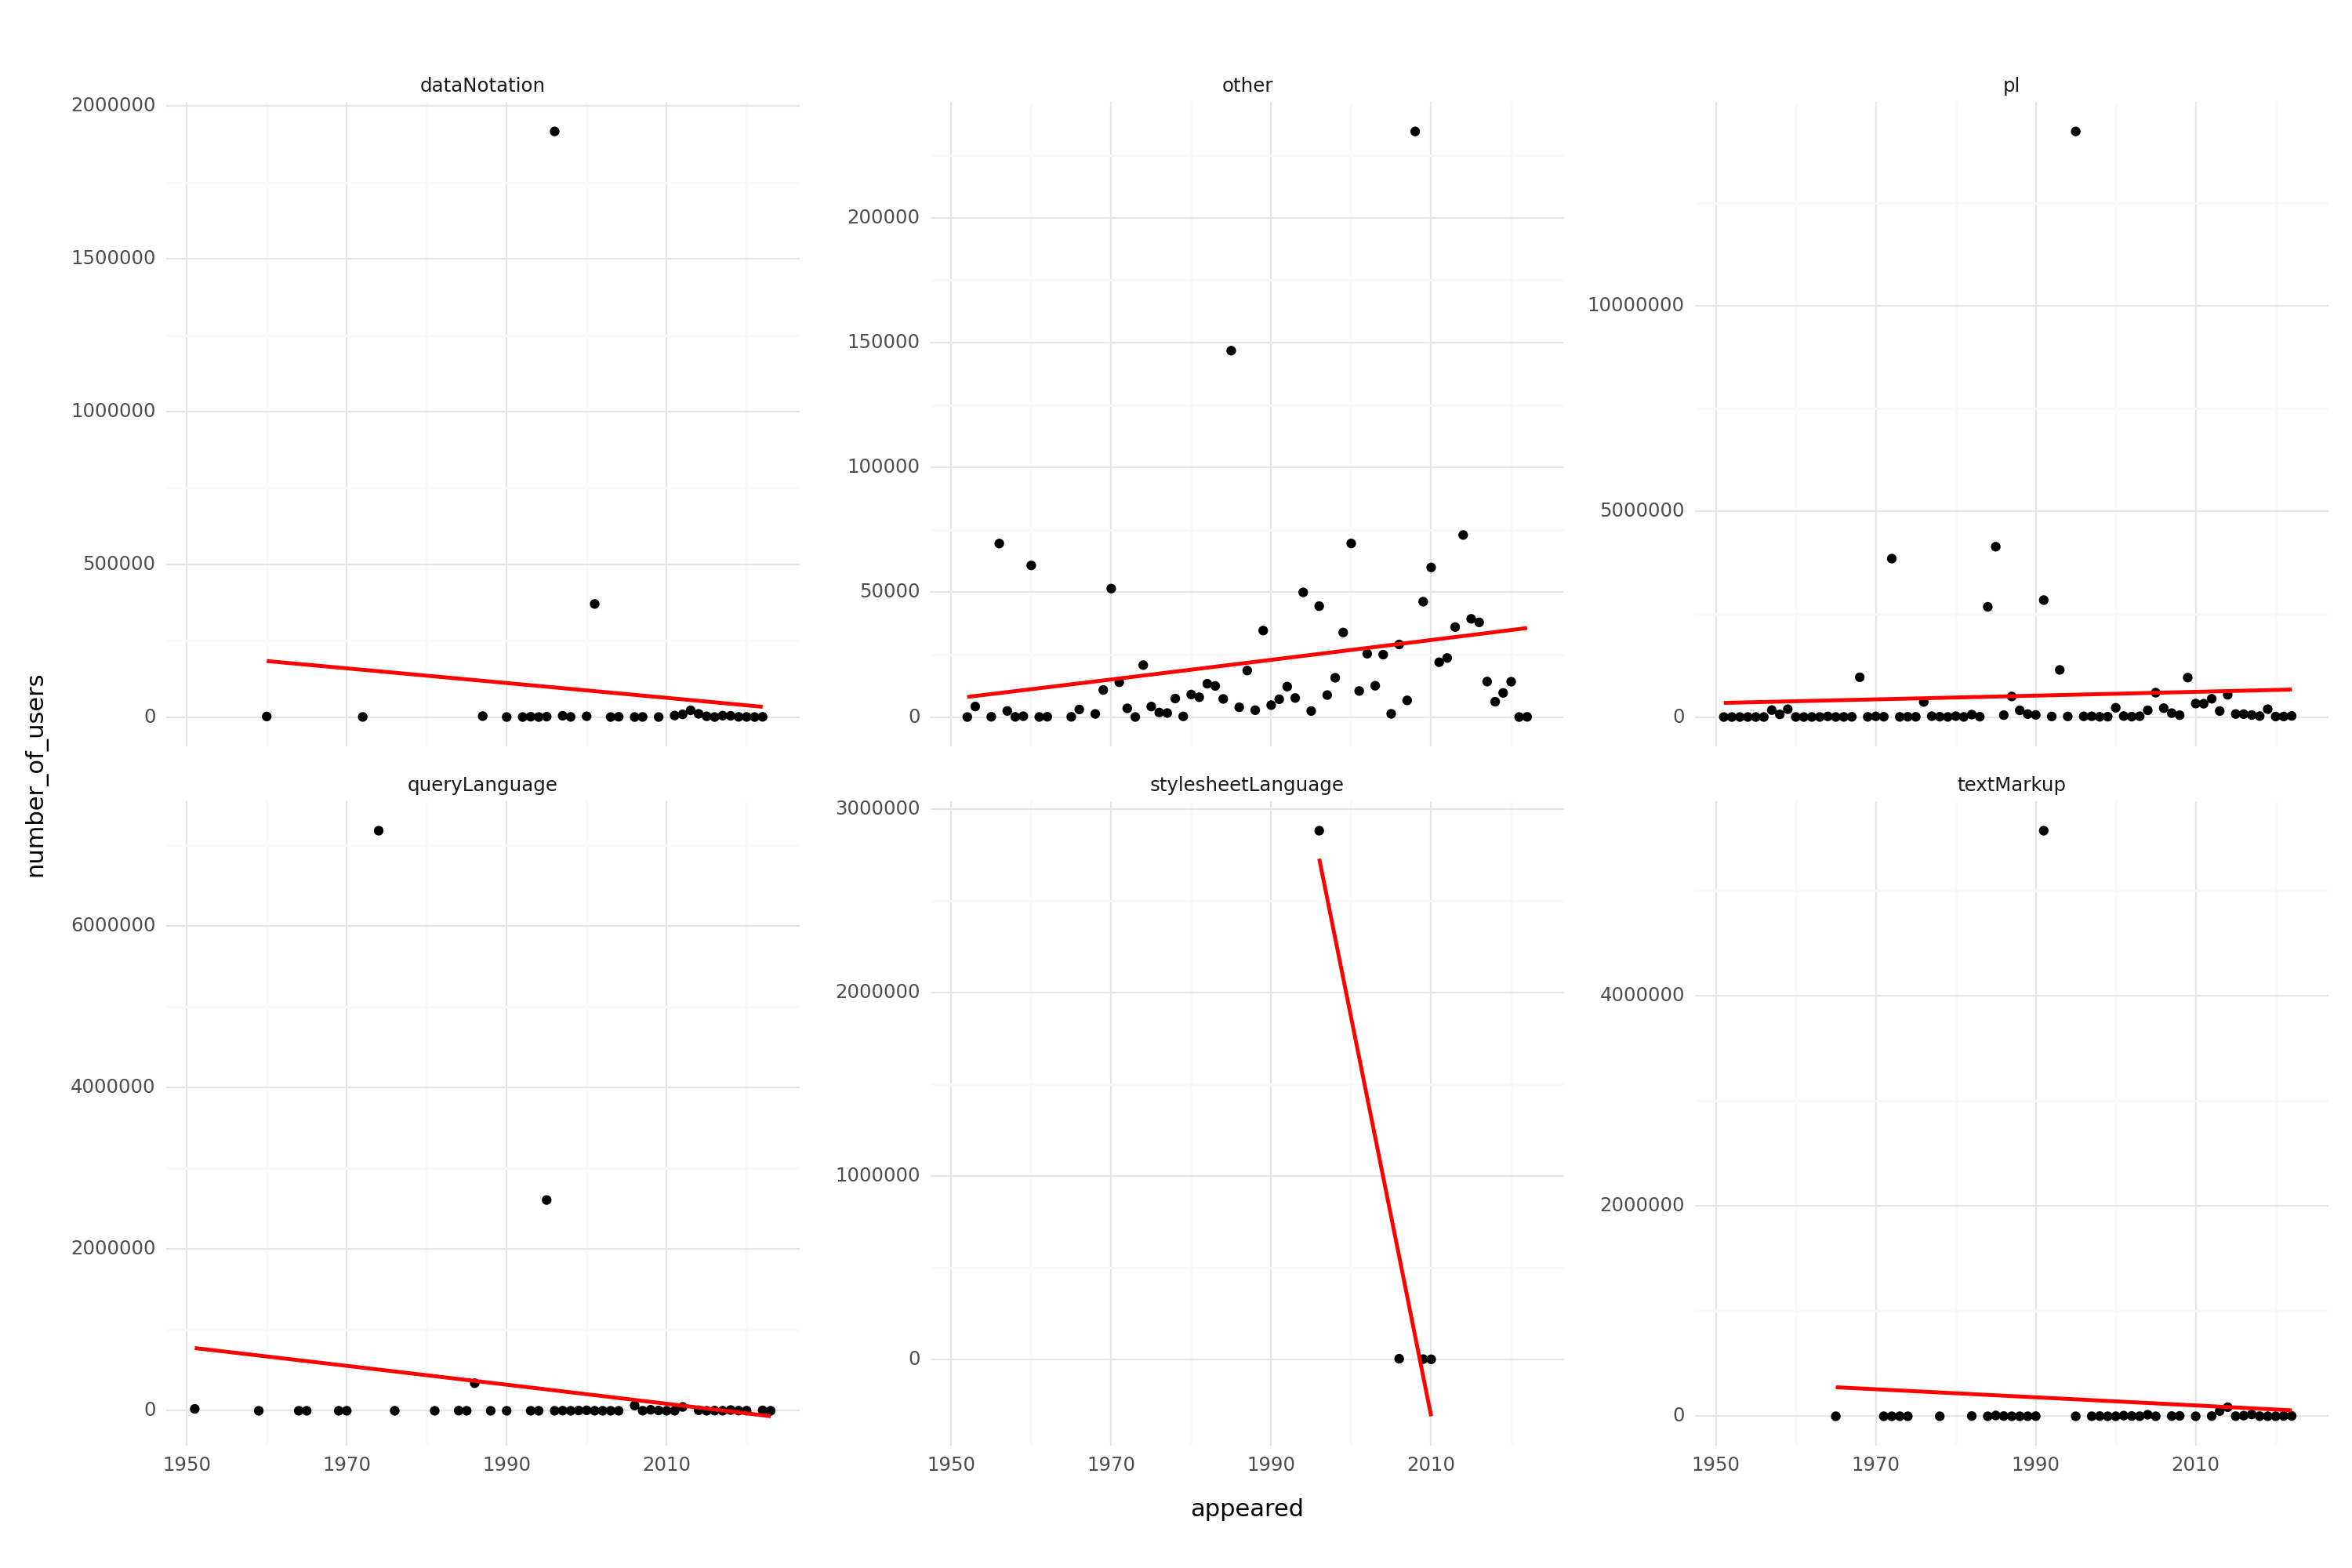

In [37]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, stat_smooth, theme_minimal

# Create scatter plots with facets and curved fitted lines
scatter_plots_with_curved_lines = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_jobs')) +
    geom_point() +
    stat_smooth(method='lm', formula='y ~ I(x**2)', se=False, color='red') +  # Add a polynomial fitted line (degree=2)
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  +# Optional: Customize the theme
   theme(figure_size=(15, 10))
)

# Show the plot
print(scatter_plots_with_curved_lines)


In [38]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, stat_smooth, theme_minimal

# Create scatter plots with facets and curved fitted lines
scatter_plots_with_curved_lines = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_users')) +
    geom_point() +
    stat_smooth(method='loess', se=False, color='red') +  # Add a loess fitted line
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  # Optional: Customize the theme
)

# Show the plot
print(scatter_plots_with_curved_lines)


ValueError: b'There are other near singularities as well. 16.565'

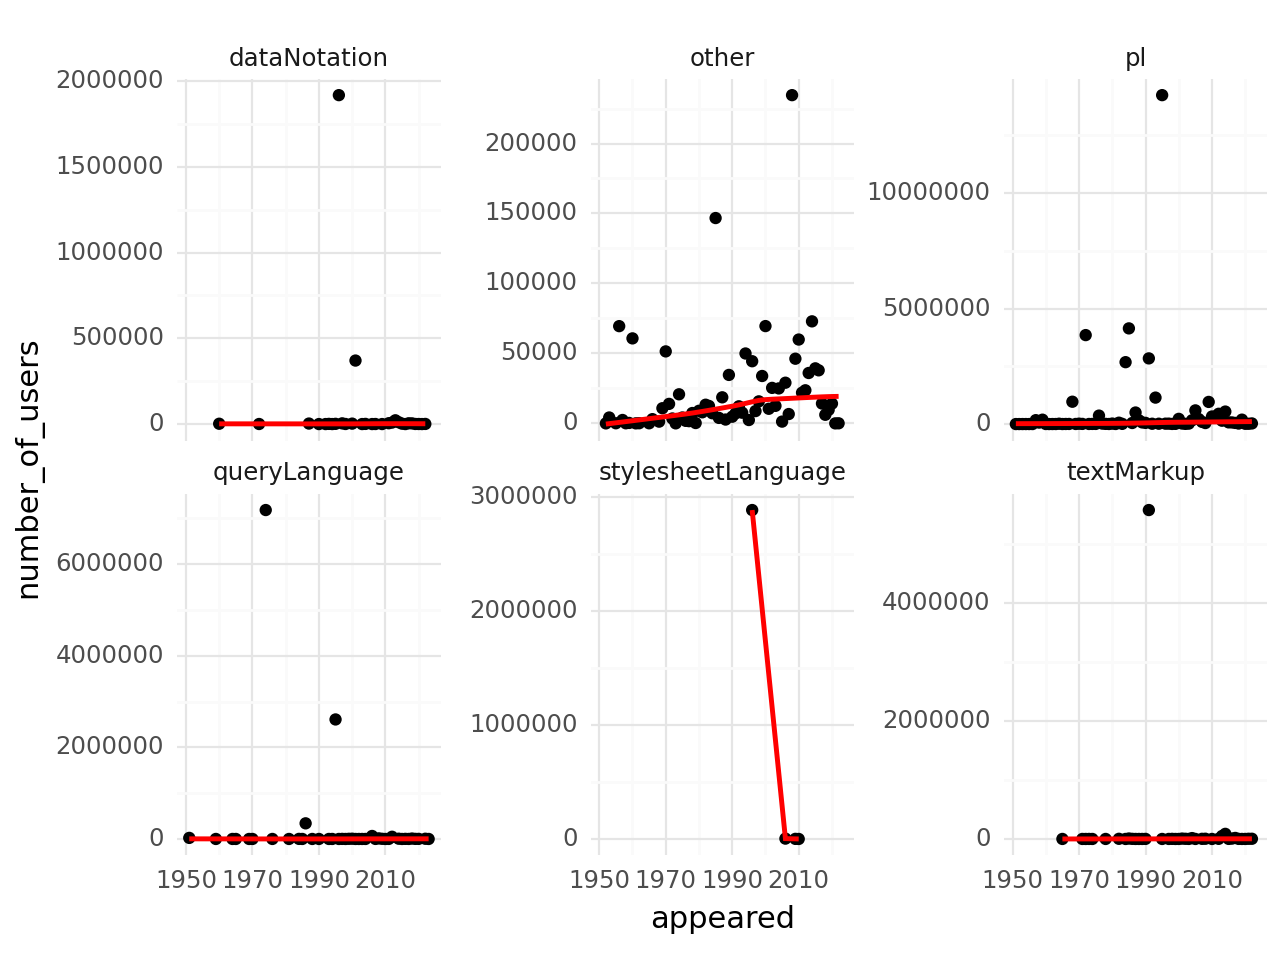

In [39]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, stat_smooth, theme_minimal

# Create scatter plots with facets and curved fitted lines
scatter_plots_with_curved_lines = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_users')) +
    geom_point() +
    stat_smooth(method='lowess', se=False, color='red') +  # Add a lowess fitted line
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  # Optional: Customize the theme
)

# Show the plot
print(scatter_plots_with_curved_lines)
